# Support vector machines

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

In [3]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
svc = LinearSVC(C=1.0)
model = svc.fit(features_standardized, target)

In [5]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

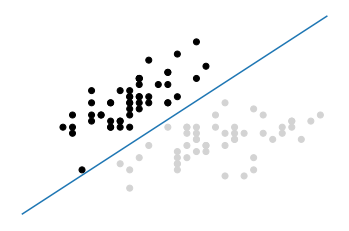

In [6]:
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.axis("off")
plt.show

In [7]:
new_observation = [[-2, 3]]
svc.predict(new_observation)

array([0])

In [8]:
from sklearn.svm import SVC

In [9]:
np.random.seed(0)
features = np.random.randn(200, 2)

In [10]:
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [11]:
svc = SVC(kernel="rbf", random_state=42, gamma=1, C=1)
model = svc.fit(features, target)

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)